 #  A Whale off the Port(folio)

In [92]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning



Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [93]:
# Whale Returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df =pd.read_csv( whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [94]:
whale_dx= whale_df.dtypes
whale_dx

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [95]:
# Count nulls
whale_df.isnull()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [96]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [97]:
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [98]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [99]:
algo_df.isnull()


,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [100]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [101]:
algo_df.dropna(inplace = True)


In [102]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [129]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [130]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
Sp500_df = pd.read_csv( sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
Sp500_df.sort_index(inplace=True)
Sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [131]:
# Check Data Types
Sp500_ds = Sp500_df.dtypes
Sp500_ds

Close    object
dtype: object

In [143]:
Sp500_df['Close'] = Sp500_df['Close'].str.replace('$', '')
Sp500_df['Close'] = Sp500_df['Close'].astype(float)

In [144]:
Sp500_df.dtypes

Close    float64
dtype: object

In [146]:
print()

In [147]:
# Calculate Daily Returns
Daily_Returns = Sp500_df.pct_change()
Daily_Returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [149]:
Daily_Returns.dropna(inplace = True)
Daily_Returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [154]:
# Rename Column
Sp500_fd = Daily_Returns.rename(columns={'Close': 'S&P 500'})
Sp500_fd.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [156]:
# Concatenate all DataFrames into a single DataFrame
Combined_Df = pd.concat([whale_df, algo_df, Sp500_fd], axis="columns", join="inner")
Combined_Df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

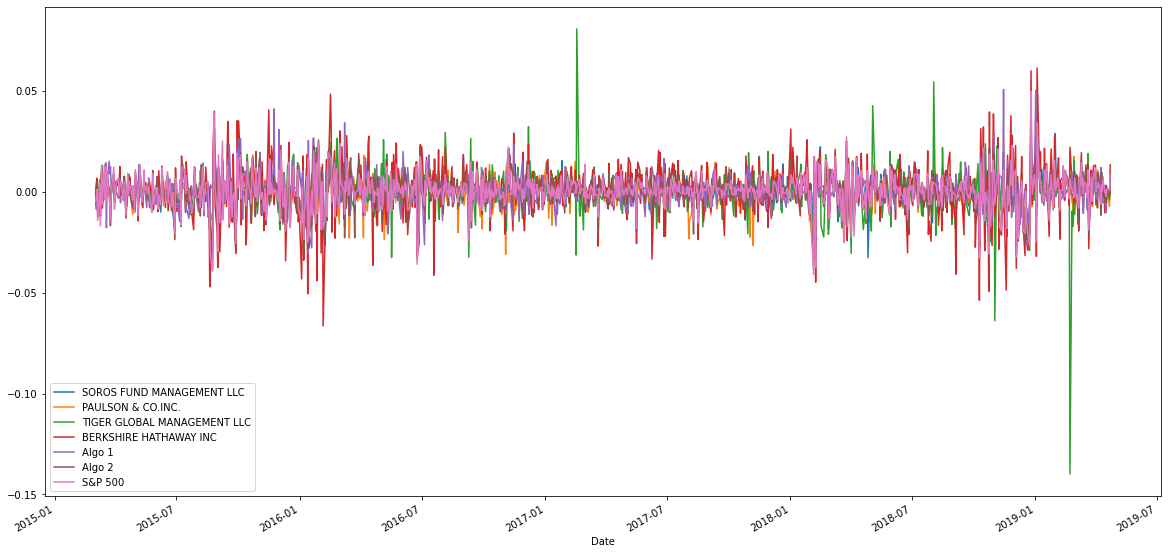

In [162]:
# Plot daily returns
Combined_Df.plot(figsize =(20,10))

In [169]:
cumalative_returns = (1 + Combined_Df).cumprod() 

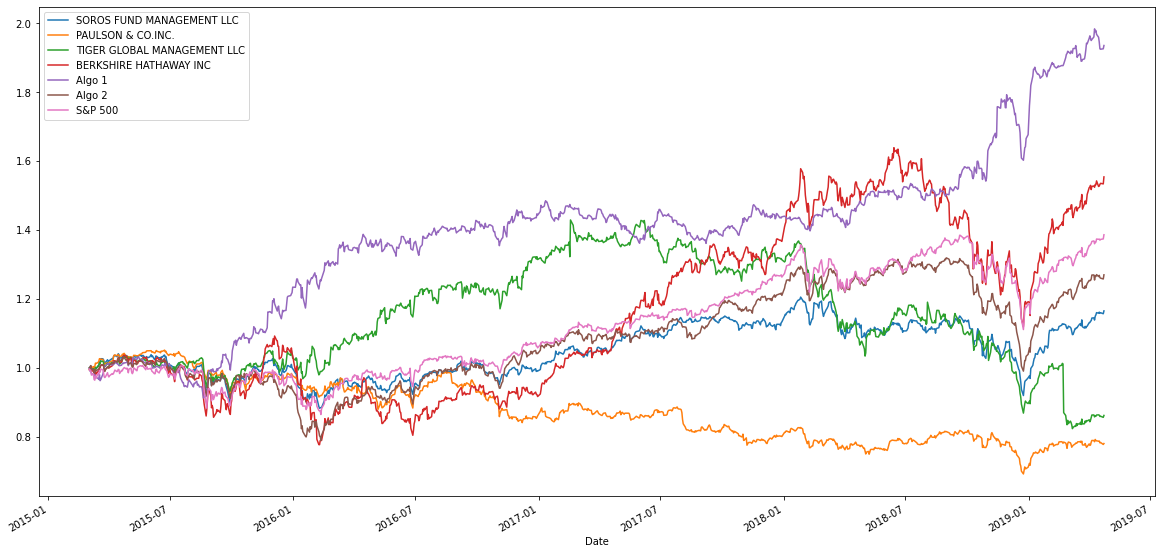

In [171]:
# Plot cumulative returns
cumalative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

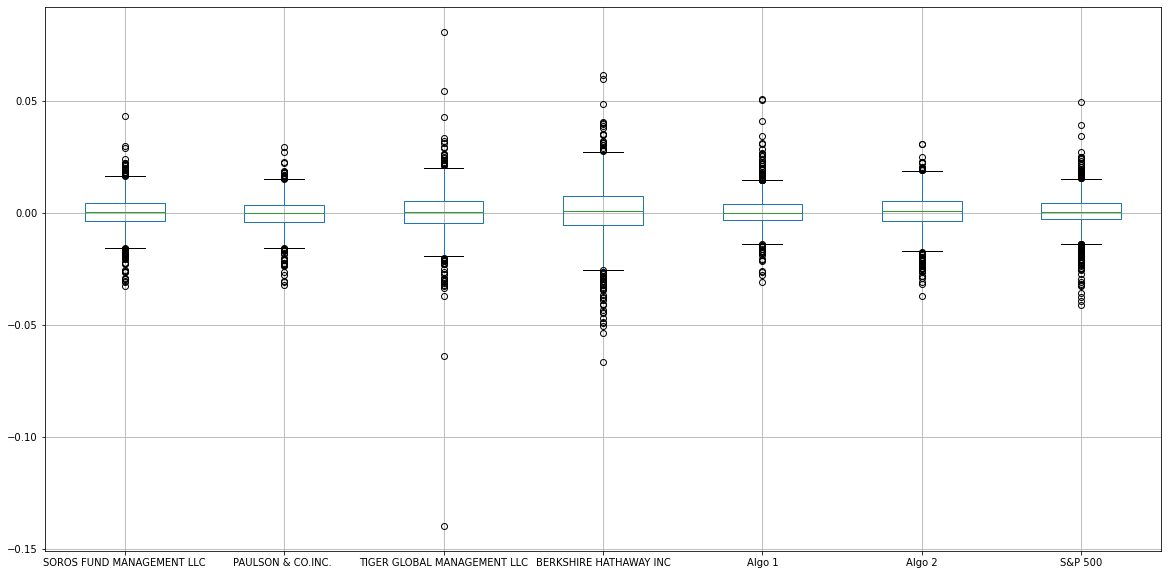

In [173]:
# Box plot to visually show risk

Combined_Df.boxplot(figsize=(20,10))

In [177]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

Standard_Deviation=Combined_Df.std()
Standard_Deviation

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [318]:
# Determine which portfolios are riskier than the S&P 500
Standard_Deviation.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [ ]:
# Tiger Global Management LLC and Berkshire Hathaway INC are riskier than S&P 500

In [181]:
# Calculate the annualized standard deviation (252 trading days)
Asd_df = Standard_Deviation * np.sqrt(252)
Asd_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

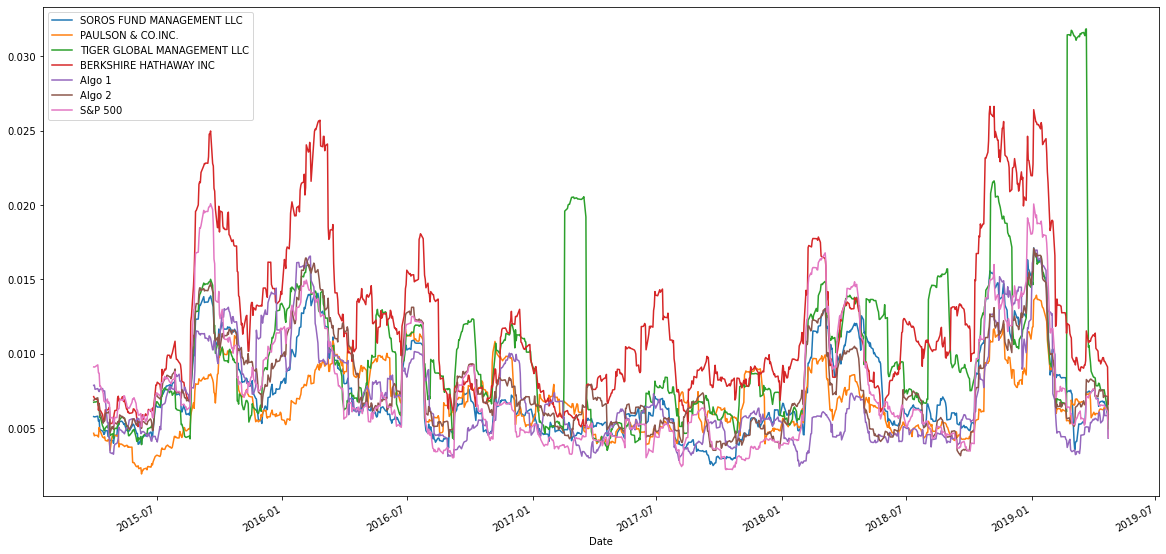

In [185]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

Combined_Df.rolling(window=21).std().plot(figsize = (20,10))

In [187]:
# Construct a correlation table
Correlation_table = Combined_Df.corr()
Correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [194]:
covariance = Combined_Df['BERKSHIRE HATHAWAY INC'].cov(Combined_Df['S&P 500'])
covariance

8.302834941861689e-05

In [195]:
 variance = Combined_Df['S&P 500'].var()
    variance

7.316632424648712e-05

In [189]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
BKSR_beta = Combined_Df['BERKSHIRE HATHAWAY INC'].cov(Combined_Df['S&P 500']) / Combined_Df['S&P 500'].var()
BKSR_beta

1.1347891297491723

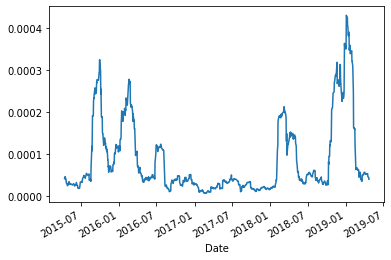

In [192]:
graph = Combined_Df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(Combined_Df['S&P 500'])
graph.plot()

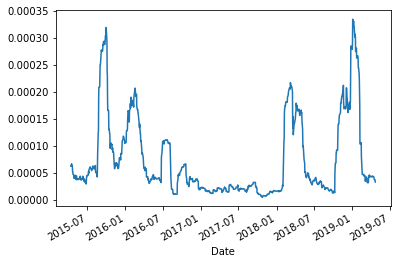

In [196]:
graph_2 =  Combined_Df['S&P 500'].rolling(window=30).var()
graph_2.plot()

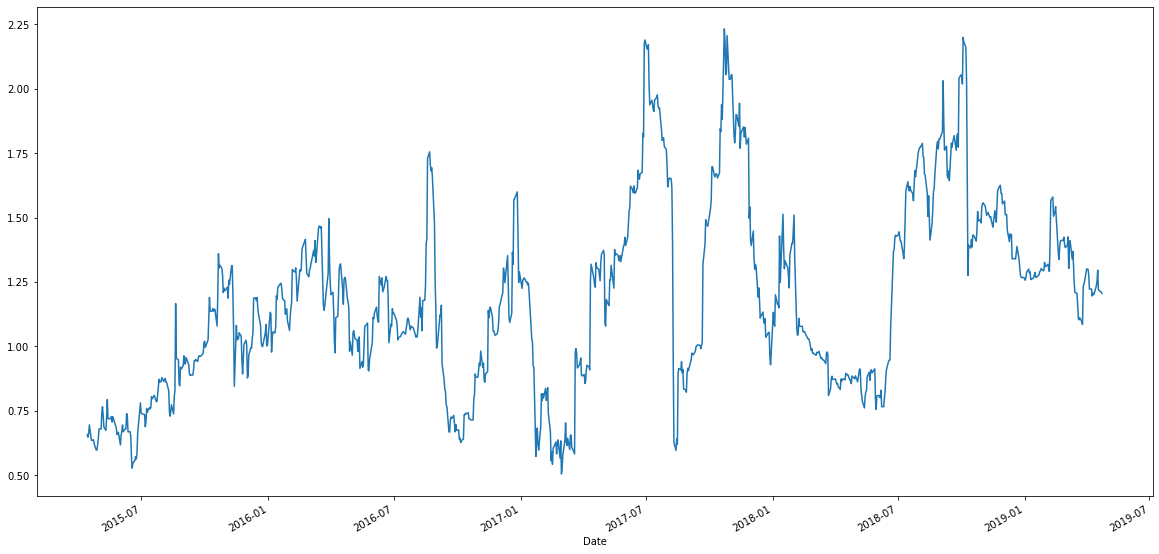

In [197]:
Beta_plot = graph / graph_2
Beta_plot.plot(figsize =(20,10))

In [206]:
# Calculate a rolling window using the exponentially weighted moving average. 
WMA_df = Combined_Df.ewm(halflife=21 ).std()
WMA_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


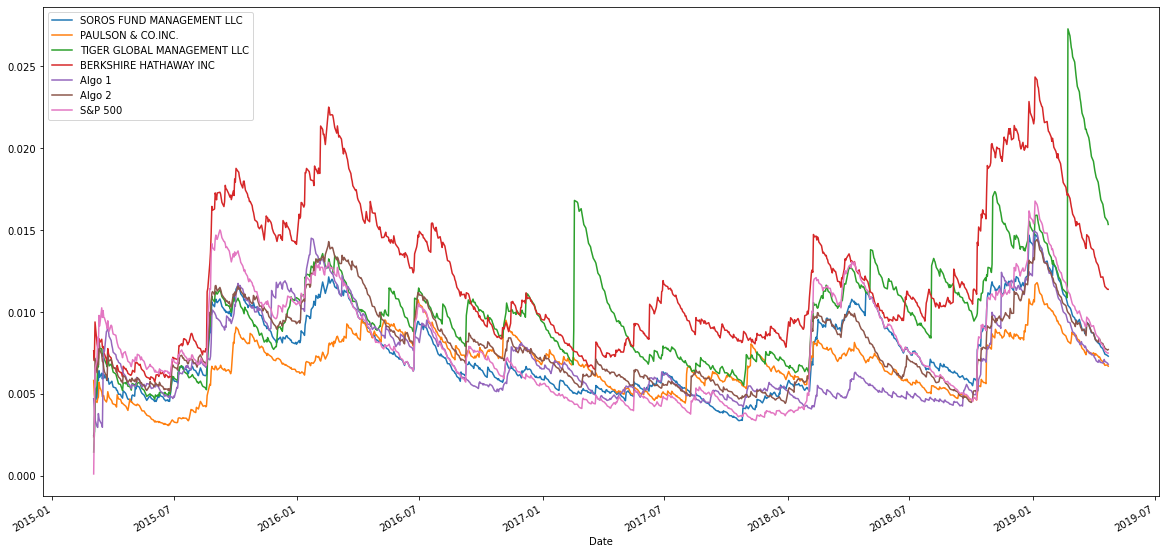

In [207]:
WMA_df.plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [209]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (Combined_Df.mean()*252) / (Combined_Df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

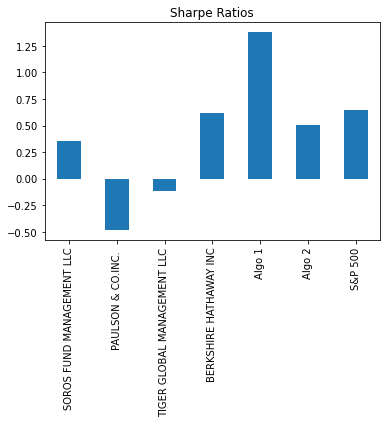

In [211]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [214]:
# Read the first stock
Goog_csv = Path("Resources/goog_historical.csv")

In [238]:
Goog_df = pd.read_csv(Goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Goog_df.sort_index(inplace=True)
Goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [266]:
Goog_ds = Goog_df.rename(columns = {'NOCP': 'GOOG'})
Goog_ds

,Symbol,GOOG
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [239]:
# Read the second stock
Appl_csv = Path("Resources/aapl_historical.csv")

In [240]:
Appl_df = pd.read_csv(Appl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Appl_df.sort_index(inplace=True)
Appl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [267]:
Appl_ds = Appl_df.rename(columns = {'NOCP': 'APPL'})
Appl_ds

,Symbol,APPL
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [241]:
# Read the third stock
Cost_csv = Path("Resources/cost_historical.csv")

In [242]:
Cost_df = pd.read_csv(Cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Cost_df.sort_index(inplace=True)
Cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [268]:
Cost_ds = Cost_df.rename(columns = {'NOCP': 'COST'})
Cost_ds

,Symbol,COST
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [269]:
Cost_df.dtypes

Symbol     object
NOCP      float64
dtype: object

In [270]:
# Concatenate all stocks into a single DataFrame
all_prices = pd.concat([Goog_ds, Appl_ds, Cost_ds], axis="columns", join="inner")
all_prices

,Symbol,GOOG,Symbol,APPL,Symbol,COST
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [271]:
# Reset the index
all_prices = all_prices.reset_index()

In [274]:
all_prices = all_prices.pivot_table(values={"GOOG", "APPL", "COST"}, index="Trade DATE")
all_prices.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [280]:
daily_r = all_prices.pct_change()
daily_r

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [281]:
# Drop Nulls
daily_r.dropna(inplace =True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [282]:
daily_r

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [284]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_r.dot(weights). head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [287]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
Joined_p =pd.concat([Combined_Df, daily_r], axis = "columns", join="inner")
Joined_p

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,APPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003637,-0.003206,-0.011339
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,-0.004019,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,0.000897,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.001018,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003287,-0.009723,0.010086


In [289]:
#Risk
volatility = Joined_p.std()*np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P 500                        0.152054
COST                           0.212034
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
GOOG                           0.255500
APPL                           0.296951
dtype: float64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [295]:
# Rolling
WFA_df = Joined_p.ewm(halflife=21).std()
WFA_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,APPL,COST,GOOG
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,0.000513,0.000996,0.002255,0.010328,0.001449,0.001961,0.005463,0.004777,0.001877,0.014727
2018-05-16,0.005255,0.004111,0.004425,0.009955,0.001635,0.002276,0.005637,0.009406,0.010132,0.012204
2018-05-17,0.004876,0.003356,0.005082,0.008110,0.003354,0.002709,0.004566,0.008158,0.008212,0.009935
2018-05-18,0.004974,0.003564,0.006946,0.007004,0.003690,0.003208,0.004023,0.007042,0.007996,0.009099
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.007630,0.006846,0.016302,0.011939,0.006922,0.007938,0.007836,0.015392,0.012074,0.012607
2019-04-17,0.007546,0.006846,0.016048,0.011746,0.007098,0.007896,0.007735,0.015427,0.011879,0.012439
2019-04-18,0.007422,0.006736,0.015788,0.011554,0.006985,0.007779,0.007608,0.015175,0.011686,0.012242
2019-04-22,0.007334,0.006764,0.015537,0.011377,0.006870,0.007670,0.007484,0.014926,0.011688,0.012125


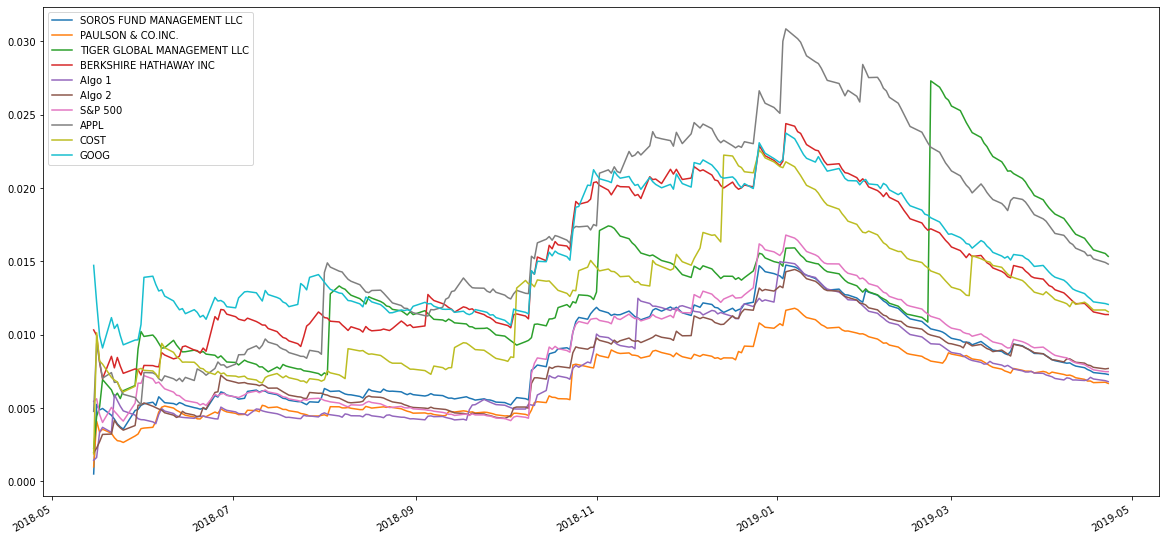

In [296]:
WFA_df.plot(figsize=(20,10))

In [297]:
# Annualized Sharpe Ratios
sharpe_ratio = (Joined_p.mean()*252) / (Joined_p.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
APPL                           0.490850
COST                           1.244419
GOOG                           0.714034
dtype: float64

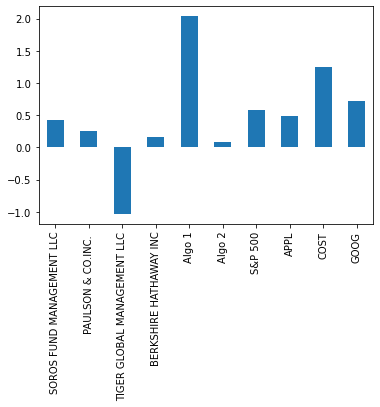

In [301]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

In [302]:
# Create a correlation analysis
Correlation_t = Joined_p.corr()
Correlation_t

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,APPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.609126,0.518175,0.682919
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.544949,0.496810,0.554123
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.334864,0.353235,0.291055
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.694062,0.431956,0.824391
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.224385,0.139522,0.272740
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.639512,0.496460,0.682227
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.759909,0.590297,0.792070
APPL,0.609126,0.544949,0.334864,0.694062,0.224385,0.639512,0.759909,1.000000,0.433918,0.692497
COST,0.518175,0.496810,0.353235,0.431956,0.139522,0.496460,0.590297,0.433918,1.000000,0.410074
GOOG,0.682919,0.554123,0.291055,0.824391,0.272740,0.682227,0.792070,0.692497,0.410074,1.000000


In [304]:
# Beta
covariance = Joined_p['APPL'].cov(Joined_p['S&P 500'])
covariance

0.00013615807352982602

In [305]:
variance = Joined_p['S&P 500'].var()
variance

9.17475896298873e-05

In [307]:
Appl_beta = covariance / variance
Appl_beta

1.4840506881880169

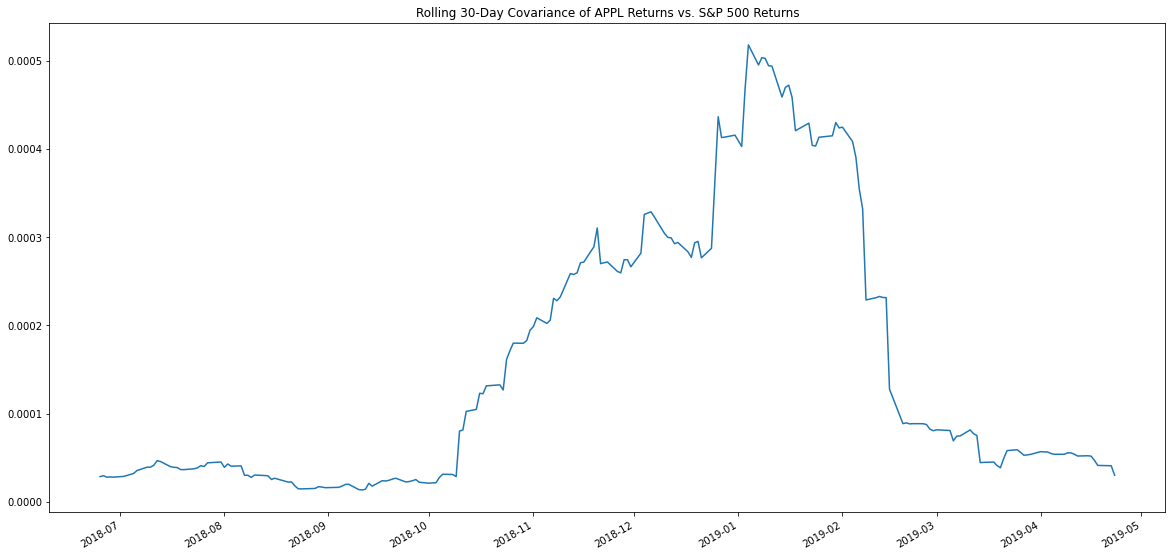

In [314]:
rolling_covariance = Joined_p['APPL'].rolling(window=30).cov(Joined_p['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of APPL Returns vs. S&P 500 Returns')

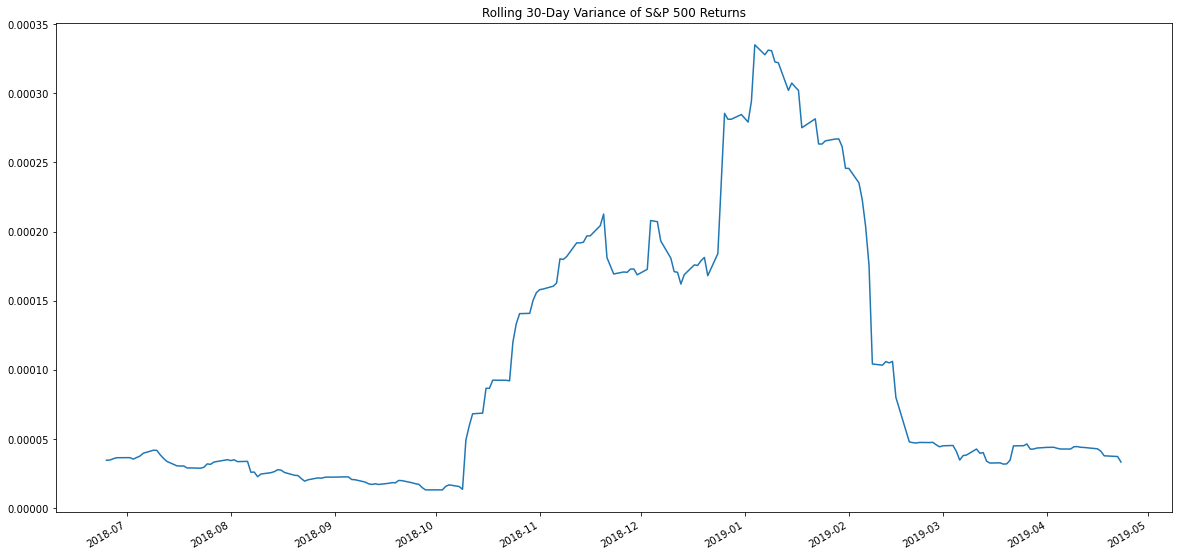

In [315]:
rolling_variance = Joined_p['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

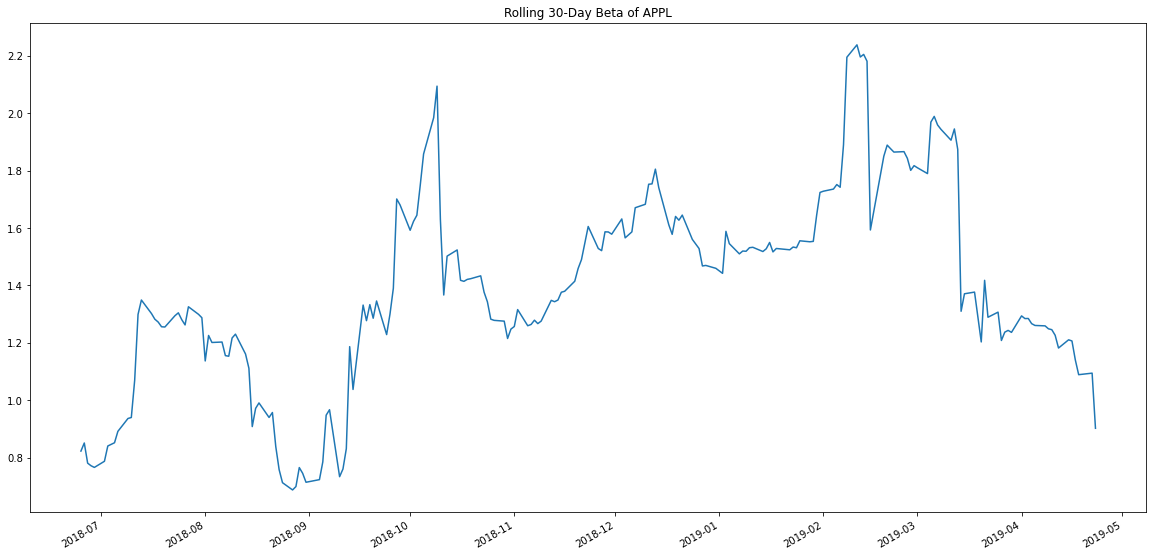

In [316]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of APPL')